# Regression Analysis

- Understand how to prepare data for linear regression by selecting the relevant numerical features and the target variables
- Learn to split the data into training and testing sets using `train_test_split`
- Evaluate the performance of the linear regression model

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd



# String INTs Function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes == 'int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        elif max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ < 4294967295:
            mapping[col] = 'uint64[pyarrow]'
        return df.astype(mapping)




# Creating a clean_housing function
def clean_housing_no_na(df):
    return(
    df
    # Using the assign method to update records
    .assign(
        # Update the 
        **df
            # Select the string cols in the df
            .select_dtypes('string')
            # replace all the NA values in the df with Missing
            .replace('', 'Missing')
            # Convert to category
            .astype('category'),
        # Using dictionary unpacking to update the Garage col with clipped col
        **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())}      
    )
    # Convert the numerical variables to the right datatypes to save memory
    .pipe(shrink_ints)
    # Fill missing values integer values with the mean of the respective int cols
    .pipe(lambda df_: df_.assign(**df_.select_dtypes('int').fillna(df_.select_dtypes('int').mean())))
    # Fill missing categorical values with the mode of the respective col
    .pipe(lambda df_: df_.assign(**df_.select_dtypes('category').fillna(df_.select_dtypes('category').mode())))
    )



# Execute the Pipeline
url = 'AmesHousing.csv'

# Load the data
# Engine = Pyarrow makes the back-end quicker with pyarrow and the pyarrow data types
df = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# Clean the data and Preview the result
aimes_df = clean_housing_no_na(df)

In [2]:
aimes_df.isna().any()

Order             False
PID               False
MS SubClass       False
MS Zoning         False
Lot Frontage      False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 82, dtype: bool

In [3]:
from sklearn import linear_model, model_selection, preprocessing


# No categorical values included in this selection
X = aimes_df.select_dtypes('number').drop(columns='SalePrice')

X.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
0,1,526301100,20,141,31770,6,5,1960,1960,112,...,528,210,62,0,0,0,0,0,5,2010
1,2,526350040,20,80,11622,5,6,1961,1961,0,...,730,140,0,0,0,120,0,0,6,2010
2,3,526351010,20,81,14267,6,6,1958,1958,108,...,312,393,36,0,0,0,0,12500,6,2010
3,4,526353030,20,93,11160,7,5,1968,1968,0,...,522,0,0,0,0,0,0,0,4,2010
4,5,527105010,60,74,13830,5,5,1997,1998,0,...,482,212,34,0,0,0,0,0,3,2010


In [4]:
y = aimes_df['SalePrice']

y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64[pyarrow]

In [5]:
# Split to train and test

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

X_train

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
844,845,907181100,20,68,9017,7,5,1999,1999,0,...,666,0,35,0,0,0,0,0,9,2009
2730,2731,905351045,150,69,1700,7,5,1980,1981,0,...,450,188,36,0,0,200,0,0,4,2006
2793,2794,907255050,20,69,14781,8,5,2001,2002,178,...,748,198,150,0,0,0,0,0,8,2006
1187,1188,534127230,20,85,11050,6,5,1968,1968,0,...,512,25,0,0,0,192,0,0,10,2008
2770,2771,907130110,60,65,12438,6,5,1995,1995,68,...,473,413,91,0,0,0,0,0,8,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1639,527226040,190,195,41600,5,5,1969,1990,0,...,828,144,0,0,0,0,0,0,11,2007
1095,1096,528290090,60,69,7750,7,5,2002,2002,101,...,403,100,35,0,0,0,0,0,4,2008
1130,1131,528490080,60,64,8791,6,5,2003,2003,0,...,673,216,56,0,0,0,0,0,5,2008
1294,1295,902109160,50,81,7308,5,5,1920,1950,0,...,225,0,0,236,0,0,0,0,6,2008


In [6]:
# y_train series with same index as X_train

y_train

844     192000
2730    148400
2793    275000
1187    150000
2770    187000
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2197, dtype: int64[pyarrow]

In [7]:
# Initialize your model
lr = linear_model.LinearRegression()

# Fit your model
lr.fit(X_train, y_train)

# Score
lr.score(X_test, y_test)

0.8398726381597008

> 84% Prediction accuracy

## Interpreting Linear Regression Models


In [8]:
# Regression Coef
lr.coef_

array([-1.08933180e+01,  1.72509491e-06, -1.72307089e+02, -3.45466338e+01,
        5.42428646e-01,  1.73944242e+04,  4.43703420e+03,  3.14160502e+02,
        1.78142805e+02,  2.98473866e+01,  7.32027646e+03,  7.31331145e+03,
        7.30696990e+03, -7.29768741e+03,  2.08640871e+01,  2.56107252e+01,
       -1.11264581e+01,  3.53483541e+01,  7.89175059e+03, -1.44326468e+03,
       -3.13459932e+02, -5.29473551e+03, -7.31839026e+03, -9.94475433e+03,
        1.53675096e+03,  3.33221975e+03,  1.44212303e+02,  6.55078677e+03,
        7.30300640e+00,  1.87512095e+01, -4.20321749e+00,  2.28560974e+01,
       -4.51025662e+00,  7.15664310e+01, -3.30274682e+01, -8.92616938e+00,
        2.01054273e+02, -8.49251046e+03])

In [9]:
# Regression Intercept
lr.intercept_

15758997.663460143

In [10]:
# Col Names
lr.feature_names_in_

array(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype=object)

In [11]:
pd.DataFrame(
            {
             'feature_names': lr.feature_names_in_,
             'coef': lr.coef_,
            }
            )

,feature_names,coef
0,Order,-10.893318
1,PID,0.000002
2,MS SubClass,-172.307089
3,Lot Frontage,-34.546634
4,Lot Area,0.542429
5,Overall Qual,17394.424197
6,Overall Cond,4437.034199
7,Year Built,314.160502
8,Year Remod/Add,178.142805
9,Mas Vnr Area,29.847387


<Axes: ylabel='feature_names'>

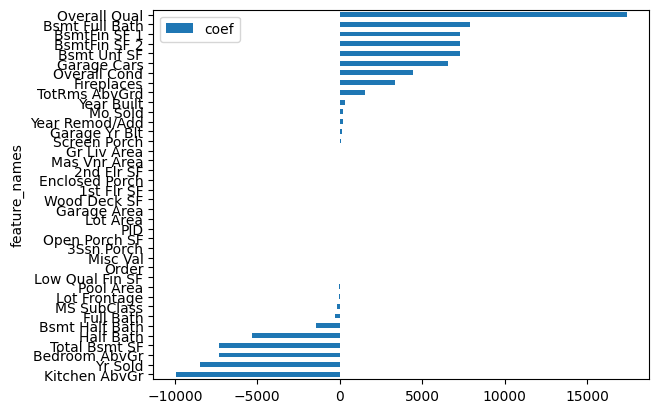

In [12]:
(
    pd.DataFrame(
            {
             'feature_names': lr.feature_names_in_,
             'coef': lr.coef_,
            })
    # Lets plot this
    .set_index('feature_names')
    # Sort the values
    .sort_values(by='coef')
    .plot.barh()
)

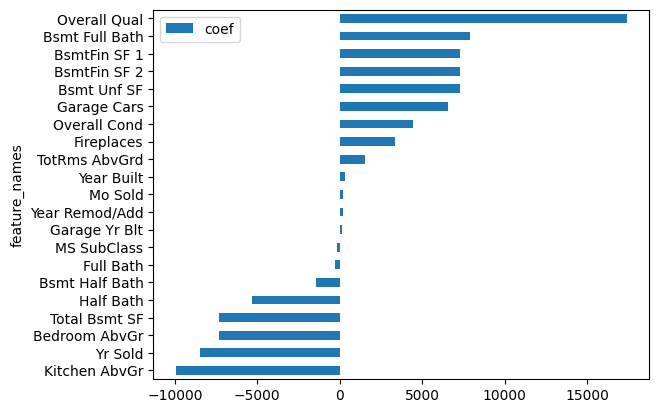

In [13]:
(
    pd.DataFrame(
            {
             'feature_names': lr.feature_names_in_,
             'coef': lr.coef_,
            })
    # Get the most important values
    .query("coef.abs().gt(100)")
    # Lets plot this
    .set_index('feature_names')
    # Sort the values
    .sort_values(by='coef')
    .plot.barh()
);

In [21]:
lr_feat = (
    pd.DataFrame(
            {
             'feature_names': lr.feature_names_in_,
             'coef': lr.coef_,
            })
    # Get the most important values
    .query("coef.abs().gt(100)")
    # Lets pullout the index
    ['feature_names']
)

## Standardizing Values

- Understand the concept of standardization
- Learn to use the `Standard Scaler` class
- Evaluate the impact of standardization on the performance of the linear regression model
- Visualize the coefficients of the LR model

In [43]:
# Working with ONLY numerical values here NO CATEGORICAL vals

X = aimes_df.select_dtypes('number').drop(columns='SalePrice')
y = aimes_df['SalePrice']


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)


# Initialize the Standard scaler and set output to pandas DF
std = preprocessing.StandardScaler().set_output(transform='pandas')

# Transform and learn the parameters of the training data
X_train_std = std.fit_transform(X_train)

# Apply  the learnt parameters from the training to the test data
X_test_std = std.transform(X_test)

In [44]:
X_test_std.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1357,-0.129147,1.010251,0.291796,-0.009955,-0.612820,1.385588,1.277083,-1.498988,0.581572,-0.572686,...,-1.138343,0.772970,0.221365,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,-0.068609,0.160921
2367,1.067606,-0.983164,2.389102,-2.238821,-1.002634,-0.047621,1.277083,0.049487,-0.574600,1.615974,...,-0.968833,-0.757068,-0.695952,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,0.300838,-1.359696
2822,1.606738,1.035175,0.058762,-0.334998,-0.362415,0.668983,-0.524941,1.070822,0.966963,0.521644,...,0.688590,0.581715,0.134001,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,-0.438057,-1.359696
2126,0.782044,1.029911,-0.873374,-0.427867,-0.252150,-1.480830,-0.524941,0.774305,0.533399,-0.572686,...,-2.211901,-0.757068,-0.695952,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,0.670286,-0.599388
1544,0.092430,1.046161,-0.640340,-0.892215,-0.382088,-0.047621,2.178095,-1.466042,0.677920,-0.572686,...,-1.293726,-0.757068,-0.695952,1.375686,-0.097955,-0.289319,-0.064071,-0.092757,0.300838,0.160921


In [45]:
# Initialize your Regg Model

lr_std = linear_model.LinearRegression()

# Fit to the standardized training data
lr_std.fit(X_train_std, y_train)

# Evaluate model on the standardized test data
lr_std.score(X_test_std, y_test)

0.839877299987259

In [46]:
# Note the diff in the coefficients
(
    pd.DataFrame(
            {
             # Note that Feature names here come from the Train Dataset 
             'feature_names': X_train_std.columns,
             'coef': lr_std.coef_,
            })
    # Sort values by Descending
    .sort_values(by='coef', ascending=False)
)

,feature_names,coef
17,Gr Liv Area,2.403014e+16
10,BsmtFin SF 1,3.362903e+06
12,Bsmt Unf SF,3.229049e+06
11,BsmtFin SF 2,1.249206e+06
5,Overall Qual,2.427672e+04
7,Year Built,9.533582e+03
9,Mas Vnr Area,5.182571e+03
6,Overall Cond,4.924147e+03
27,Garage Cars,4.901418e+03
4,Lot Area,4.473663e+03


> Score remains the same in this instance after standardizing 84%

<Axes: ylabel='feature_names'>

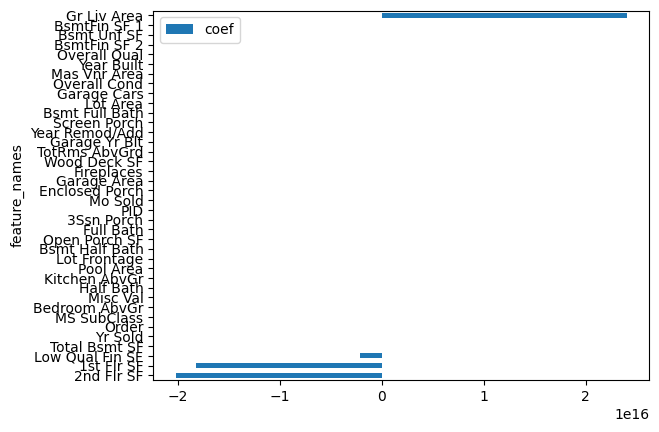

In [18]:
(
    pd.DataFrame(
            {
             # Note that Feature names here come from the Train Dataset 
             'feature_names': X_train.columns,
             'coef': lr_std.coef_,
            })
    # Lets plot this
    .set_index('feature_names')
    # Sort the values
    .sort_values(by='coef')
    .plot.barh()
)

<Axes: ylabel='feature_names'>

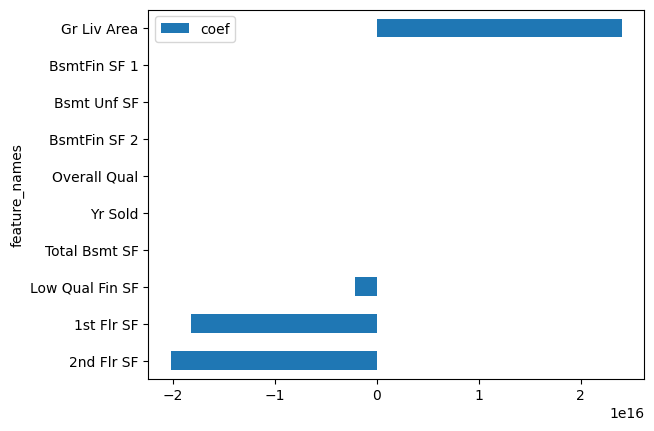

In [47]:
(
    pd.DataFrame(
            {
             # Note that Feature names here come from the Train Dataset 
             'feature_names': X_train_std.columns,
             'coef': lr_std.coef_,
            })
    # Lets filter the records
    .query("coef.abs().gt(1e4)")
    # Lets plot this
    .set_index('feature_names')
    # Sort the values
    .sort_values(by='coef')
    .plot.barh()
)

In [22]:
lr_std_feat = (
    pd.DataFrame(
            {
             # Note that Feature names here come from the Train Dataset 
             'feature_names': X_train.columns,
             'coef': lr_std.coef_,
            })
    # Lets filter the records
    .query("coef.abs().gt(1e4)")
    # Sort the values
    .sort_values(by='coef', ascending=False)
    ['feature_names']
)

In [28]:
common_feat = set(lr_feat.to_list() + lr_std_feat.to_list())

In [37]:
# lOOK AT cORR
(
    X
    # Select common features
    [list(common_feat)]
    # Assign the y-value
    .assign(SalePrice=y)
    # Calc the Corr Matrix
    .corr(method='spearman')
    # Add some styling
    .style
    .background_gradient(cmap='RdBu', vmin=-1,vmax=1)
    # Set stick
    .set_sticky(axis='index')
)

,Garage Cars,Bedroom AbvGr,Year Remod/Add,Total Bsmt SF,Bsmt Half Bath,BsmtFin SF 2,Half Bath,Year Built,Low Qual Fin SF,Full Bath,Yr Sold,Gr Liv Area,2nd Flr SF,Bsmt Unf SF,Mo Sold,BsmtFin SF 1,Garage Yr Blt,MS SubClass,Overall Cond,Overall Qual,TotRms AbvGrd,Fireplaces,Bsmt Full Bath,Kitchen AbvGr,1st Flr SF,SalePrice
Garage Cars,1.000000,0.121617,0.460278,0.450182,-0.040346,-0.061064,0.244380,0.600869,-0.071396,0.525132,-0.021218,0.523168,0.151824,0.139434,0.047780,0.203622,0.581333,0.019685,-0.258443,0.611534,0.385417,0.348906,0.162465,-0.018348,0.449051,0.701717
Bedroom AbvGr,0.121617,1.000000,-0.032359,0.055826,0.018713,-0.025415,0.285606,-0.032275,0.021183,0.320047,-0.019007,0.525856,0.502483,0.167877,0.048368,-0.100159,-0.042036,0.056779,-0.012151,0.077886,0.666389,0.106074,-0.153640,0.186053,0.114006,0.196834
Year Remod/Add,0.460278,-0.032359,1.000000,0.309645,-0.056891,-0.117802,0.179883,0.707678,-0.058727,0.455856,0.041084,0.318917,0.090110,0.166796,0.014296,0.087674,0.714328,0.015590,-0.075119,0.579323,0.207894,0.148938,0.120594,-0.144737,0.250180,0.601454
Total Bsmt SF,0.450182,0.055826,0.309645,1.000000,0.003235,0.064978,-0.109387,0.441991,-0.069140,0.338012,-0.015665,0.378338,-0.312733,0.331033,0.022676,0.428150,0.347095,-0.300895,-0.223237,0.472555,0.233150,0.322502,0.322710,-0.002096,0.828355,0.605796
Bsmt Half Bath,-0.040346,0.018713,-0.056891,0.003235,1.000000,0.132587,-0.067702,-0.054468,-0.017226,-0.046353,-0.012751,-0.064947,-0.064418,-0.103231,0.023849,0.091479,-0.081806,0.004888,0.088785,-0.046806,-0.059036,0.033512,-0.154579,-0.052599,0.009434,-0.029509
BsmtFin SF 2,-0.061064,-0.025415,-0.117802,0.064978,0.132587,1.000000,-0.063684,-0.096314,-0.015648,-0.107884,0.021492,-0.078318,-0.119008,-0.297560,-0.011591,0.058016,-0.141654,-0.093818,0.096973,-0.093019,-0.088324,0.037770,0.165042,-0.046989,0.055605,-0.035360
Half Bath,0.244380,0.285606,0.179883,-0.109387,-0.067702,-0.063684,1.000000,0.265468,-0.030100,0.160459,-0.002871,0.439919,0.619507,-0.006754,-0.002014,-0.026230,0.217727,0.266447,-0.106949,0.294043,0.359647,0.214376,-0.049758,-0.073427,-0.146107,0.333657
Year Built,0.600869,-0.032275,0.707678,0.441991,-0.054468,-0.096314,0.265468,1.000000,-0.123324,0.536116,-0.009527,0.317367,0.022695,0.124198,0.016111,0.214497,0.859479,0.035632,-0.422306,0.664590,0.181709,0.199048,0.188016,-0.129373,0.324522,0.680822
Low Qual Fin SF,-0.071396,0.021183,-0.058727,-0.069140,-0.017226,-0.015648,-0.030100,-0.123324,1.000000,0.001400,-0.016220,0.053906,0.031099,0.034909,0.018548,-0.082895,-0.037896,0.059254,0.018427,-0.050242,0.047285,-0.032479,-0.057907,0.003517,-0.039547,-0.071947
Full Bath,0.525132,0.320047,0.455856,0.338012,-0.046353,-0.107884,0.160459,0.536116,0.001400,1.000000,-0.001310,0.662830,0.360636,0.242009,0.049276,0.026908,0.538564,0.198671,-0.282743,0.556720,0.537168,0.256697,-0.029200,0.170911,0.366992,0.634161


In [32]:
list(common_feat)

['Garage Cars',
 'Bedroom AbvGr',
 'Year Remod/Add',
 'Total Bsmt SF',
 'Bsmt Half Bath',
 'BsmtFin SF 2',
 'Half Bath',
 'Year Built',
 'Low Qual Fin SF',
 'Full Bath',
 'Yr Sold',
 'Gr Liv Area',
 '2nd Flr SF',
 'Bsmt Unf SF',
 'Mo Sold',
 'BsmtFin SF 1',
 'Garage Yr Blt',
 'MS SubClass',
 'Overall Cond',
 'Overall Qual',
 'TotRms AbvGrd',
 'Fireplaces',
 'Bsmt Full Bath',
 'Kitchen AbvGr',
 '1st Flr SF']

## Regression with XGBoost

Goals:
- Learn to use the XGBoost library (`xgboost`) for regression tasks
- Evaluate the performance of the XG Boost model
- Explore the importance of features in the xgboost model using the feature importances

In [38]:
# Working with ONLY numerical values here NO CATEGORICAL vals
X = aimes_df.select_dtypes('number').drop(columns='SalePrice')
y = aimes_df['SalePrice']


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

# Output should not be a numpy array but a pandas DF
std = preprocessing.StandardScaler().set_output(transform='pandas')

X_train_std = std.fit_transform(X_train)

X_test_std = std.transform(X_test)

In [39]:
X_test_std.head()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1357,-0.129147,1.010251,0.291796,-0.009955,-0.612820,1.385588,1.277083,-1.498988,0.581572,-0.572686,...,-1.138343,0.772970,0.221365,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,-0.068609,0.160921
2367,1.067606,-0.983164,2.389102,-2.238821,-1.002634,-0.047621,1.277083,0.049487,-0.574600,1.615974,...,-0.968833,-0.757068,-0.695952,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,0.300838,-1.359696
2822,1.606738,1.035175,0.058762,-0.334998,-0.362415,0.668983,-0.524941,1.070822,0.966963,0.521644,...,0.688590,0.581715,0.134001,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,-0.438057,-1.359696
2126,0.782044,1.029911,-0.873374,-0.427867,-0.252150,-1.480830,-0.524941,0.774305,0.533399,-0.572686,...,-2.211901,-0.757068,-0.695952,-0.370773,-0.097955,-0.289319,-0.064071,-0.092757,0.670286,-0.599388
1544,0.092430,1.046161,-0.640340,-0.892215,-0.382088,-0.047621,2.178095,-1.466042,0.677920,-0.572686,...,-1.293726,-0.757068,-0.695952,1.375686,-0.097955,-0.289319,-0.064071,-0.092757,0.300838,0.160921


In [41]:
import xgboost as xgb


# Initialize your model
xgb_reg = xgb.XGBRegressor()


# Fit the model the Training data
xgb_reg.fit(X_train_std, y_train)


# Test the model on the evaluation set
xgb_reg.score(X_test_std, y_test)

0.9075053104570684

> The xgboost model performs better 91%

<Axes: >

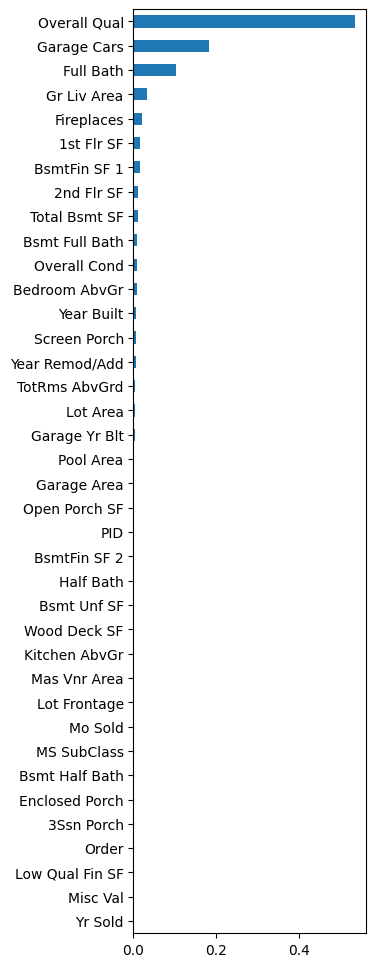

In [50]:
# Lets plot our xgboost model

(
    pd.Series(
        xgb_reg.feature_importances_,
        index=X_train_std.columns
    )
    .sort_values()
    .plot.barh(figsize=(3,12))
)

### XGBoost with Categorical Cols 

In [68]:
X_num_cat = (
                aimes_df
                # Update all numeric types to Int64
                .assign(**aimes_df.select_dtypes('number').astype('Int64'))
                # Drop the Sale Price Col
                .drop(columns='SalePrice')
            )

y = aimes_df['SalePrice']


X_num_cat_train, X_num_cat_test, y_train, y_test = model_selection.train_test_split(X_num_cat, y, random_state=42)

X_num_cat_train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
844,845,907181100,20,RL,68,9017,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,9,2009,WD,Normal
2730,2731,905351045,150,RL,69,1700,Pave,NA,Reg,HLS,...,200,0,NA,NA,NA,0,4,2006,WD,Normal
2793,2794,907255050,20,RL,69,14781,Pave,NA,IR2,Lvl,...,0,0,NA,NA,NA,0,8,2006,WD,Normal
1187,1188,534127230,20,RL,85,11050,Pave,NA,Reg,Lvl,...,192,0,NA,GdWo,NA,0,10,2008,WD,Family
2770,2771,907130110,60,RL,65,12438,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,8,2006,WD,Normal


In [69]:
# Making xgboost work with categorical variables

# Watchout for the Params
xgb_reg_num_cat = xgb.XGBRegressor(enable_categorical=True, tree_method='hist')

# Train on the train data
xgb_reg_num_cat.fit(X_num_cat_train, y_train)

# Test on the test data
xgb_reg_num_cat.score(X_num_cat_test, y_test)

0.9154703674965817

> We get the categories here 91.5%

<Axes: >

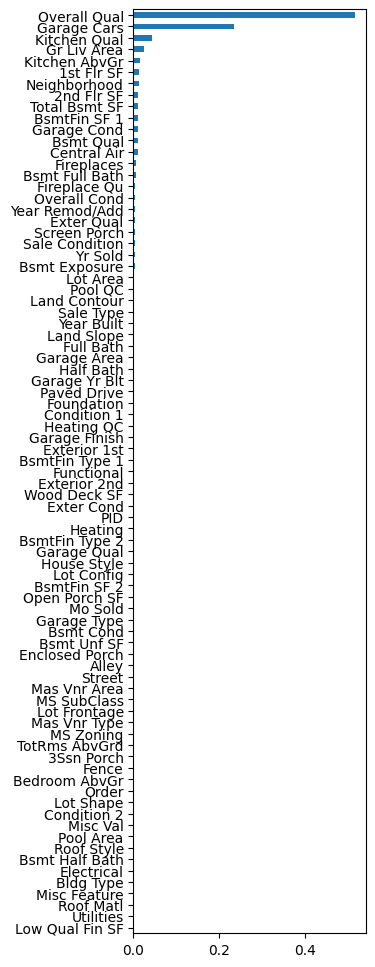

In [72]:
# Lets plot our xgboost model

(
    pd.Series(
        xgb_reg_num_cat.feature_importances_,
        index=X_num_cat.columns
    )
    .sort_values()
    .plot.barh(figsize=(3,12))
)